In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("video_games.csv")
dataset.head()

,Unnamed: 0,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [2]:
# Drop the column that have too many categorical variables
dataset.drop(columns=dataset.columns[[0,1,2,4,5,6,7,8,9,12,14,15,16]], axis=1, inplace=True)
dataset

,year_of_release,global_sales,critic_score,user_score
0,2006,82.53,76.0,8.0
1,2008,35.52,82.0,8.3
2,2009,32.77,80.0,8.0
3,2006,29.80,89.0,8.5
4,2006,28.92,58.0,6.6
...,...,...,...,...
6820,2001,0.01,46.0,2.4
6821,2002,0.01,81.0,8.8
6822,2014,0.01,80.0,7.6
6823,2011,0.01,61.0,5.8


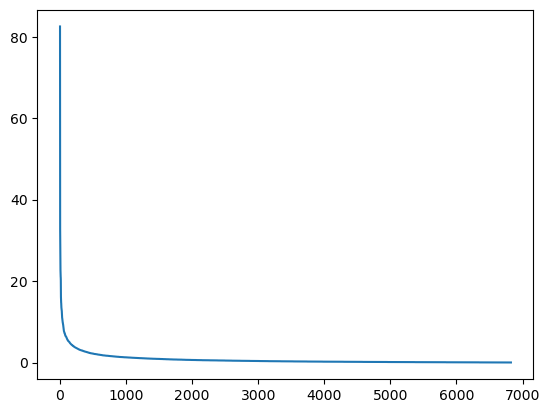

In [3]:
#separate the other attributes from the predicting attribute
x = dataset.drop('global_sales',axis=1)
#separte the predicting attribute into Y for model training 
y = dataset['global_sales']

dataset['global_sales'].plot(kind = 'line')
plt.show()

In [4]:
# # handle categorical variable
# platform=pd.get_dummies(x,drop_first=True)
# # dropping extra column
# x= x.drop('platform',axis=1)
# # concatation of independent variables and new cateorical variable.
# x=pd.concat([x,platform],axis=1)
# x

In [5]:
# Checking for null values
print(dataset.info())

# Checking for outliers
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  6825 non-null   int64  
 1   global_sales     6825 non-null   float64
 2   critic_score     6825 non-null   float64
 3   user_score       6825 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 213.4 KB
None
       year_of_release  global_sales  critic_score   user_score
count      6825.000000   6825.000000   6825.000000  6825.000000
mean       2007.436777      0.777590     70.272088     7.185626
std           4.211248      1.963443     13.868572     1.439942
min        1985.000000      0.010000     13.000000     0.500000
25%        2004.000000      0.110000     62.000000     6.500000
50%        2007.000000      0.290000     72.000000     7.500000
75%        2011.000000      0.750000     80.000000     8.200000
max        2016.000000     82.530000     98.00000

In [6]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [7]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred =  LR.predict(x_test)
y_pred

array([ 1.5002847 ,  0.83716073,  1.20170851, ...,  0.84680018,
       -0.31895895,  1.04381277])

In [9]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.10732052751011734
mean_sqrd_error is== 2.4260009287136297
root_mean_squared error of is== 1.5575624959254861


In [11]:
#calculate mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.7766159818829222


In [14]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 0.44312209666930763


In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.10732052751011734


In [16]:
n=6825
k=3
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.10692791082378539
